In [10]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Upload file
print("Please upload the company ownership data CSV file...")
uploaded = files.upload()  # This will open a file selection dialog

# Step 2: Read the uploaded CSV file
filename = list(uploaded.keys())[0]  # Get the uploaded file name
df = pd.read_csv(filename)

# Check basic information about the data
print(f"Dataset size: {df.shape}")
print("Data preview:")
print(df.head())

# Step 3: Construct the ownership matrix
# Collect all unique entities
all_entities = set(df['company_id']).union(set(df['shareholder_id']))
n = len(all_entities)
print(f"Total unique entities: {n}")

# Create entity to index mapping
entity_to_index = {entity: idx for idx, entity in enumerate(all_entities)}
index_to_entity = {idx: entity for entity, idx in entity_to_index.items()}

# Create an n×n matrix
A = np.zeros((n, n))

# Fill in ownership data
for _, row in df.iterrows():
    company_idx = entity_to_index[row['company_id']]
    shareholder_idx = entity_to_index[row['shareholder_id']]
    A[shareholder_idx, company_idx] = row['shareholder_percent'] / 100

# Calculate basic statistics of the matrix
nonzero_count = np.count_nonzero(A)
sparsity = 1 - (nonzero_count / (n * n))
print(f"\nMatrix statistics:")
print(f"- Matrix dimensions: {n}x{n}")
print(f"- Number of non-zero elements: {nonzero_count}")
print(f"- Matrix sparsity: {sparsity:.4f} (i.e., {sparsity*100:.2f}% of elements are 0)")

Please upload the company ownership data CSV file...


Saving synthetic_company_structures_500_links.csv to synthetic_company_structures_500_links (1).csv
Dataset size: (500, 3)
Data preview:
   company_id  shareholder_id  shareholder_percent
0         684             881             1.000000
1         473             365           100.000000
2         883             376            16.218391
3         218              61           100.000000
4         184             510            62.000000
Total unique entities: 618

Matrix statistics:
- Matrix dimensions: 618x618
- Number of non-zero elements: 500
- Matrix sparsity: 0.9987 (i.e., 99.87% of elements are 0)


In [ ]:
# 5. Random sampling to show ownership relationships in the matrix
nonzero_indices = np.where(A > 0)
random_samples = np.random.choice(len(nonzero_indices[0]), size=min(20, len(nonzero_indices[0])), replace=False)

print("\nRandom 20 ownership relationship samples from matrix A:")
print("{:<15} {:<15} {:<15}".format("Shareholder ID", "Company ID", "Ownership Percentage"))
print("-" * 45)
for idx in random_samples:
    i, j = nonzero_indices[0][idx], nonzero_indices[1][idx]
    shareholder = index_to_entity[i]
    company = index_to_entity[j]
    percentage = A[i, j] * 100
    print("{:<15} {:<15} {:<15.2f}%".format(shareholder, company, percentage))


Random 20 ownership relationship samples from matrix A:
Shareholder ID  Company ID      Ownership Percentage
---------------------------------------------
359             404             100.00         %
247             886             100.00         %
26              879             61.00          %
661             976             72.00          %
60              96              98.00          %
108             214             42.00          %
908             585             100.00         %
689             685             100.00         %
333             599             100.00         %
20              863             100.00         %
659             261             100.00         %
612             520             100.00         %
934             576             100.00         %
32              402             96.00          %
445             495             100.00         %
116             911             100.00         %
945             885             100.00         %
263        


Calculating Leontief inverse matrix (I - A)^(-1)...

Leontief inverse matrix preview (first 10x10):
[[ 1.        0.        0.        0.        0.        0.        0.
  -0.        0.        0.      ]
 [ 0.        1.        0.        0.        0.        0.        0.
  -0.        0.        0.      ]
 [ 0.        0.        1.        0.        0.        0.        0.
  -0.        0.        0.      ]
 [ 0.        0.        0.        1.        0.        0.        0.
  -0.        0.        0.      ]
 [ 0.        0.        0.        0.        1.        0.        0.
  -0.        0.        0.      ]
 [ 0.        0.        0.        0.        0.        1.        0.
  -0.        0.        0.      ]
 [ 0.        0.        0.        0.        0.        0.        1.
  -0.        0.        0.      ]
 [ 0.        0.        0.        0.        0.        0.        0.
   1.        0.        0.      ]
 [ 0.        0.        0.        0.        0.        0.        0.
   0.        1.        0.      ]
 [ 0.075

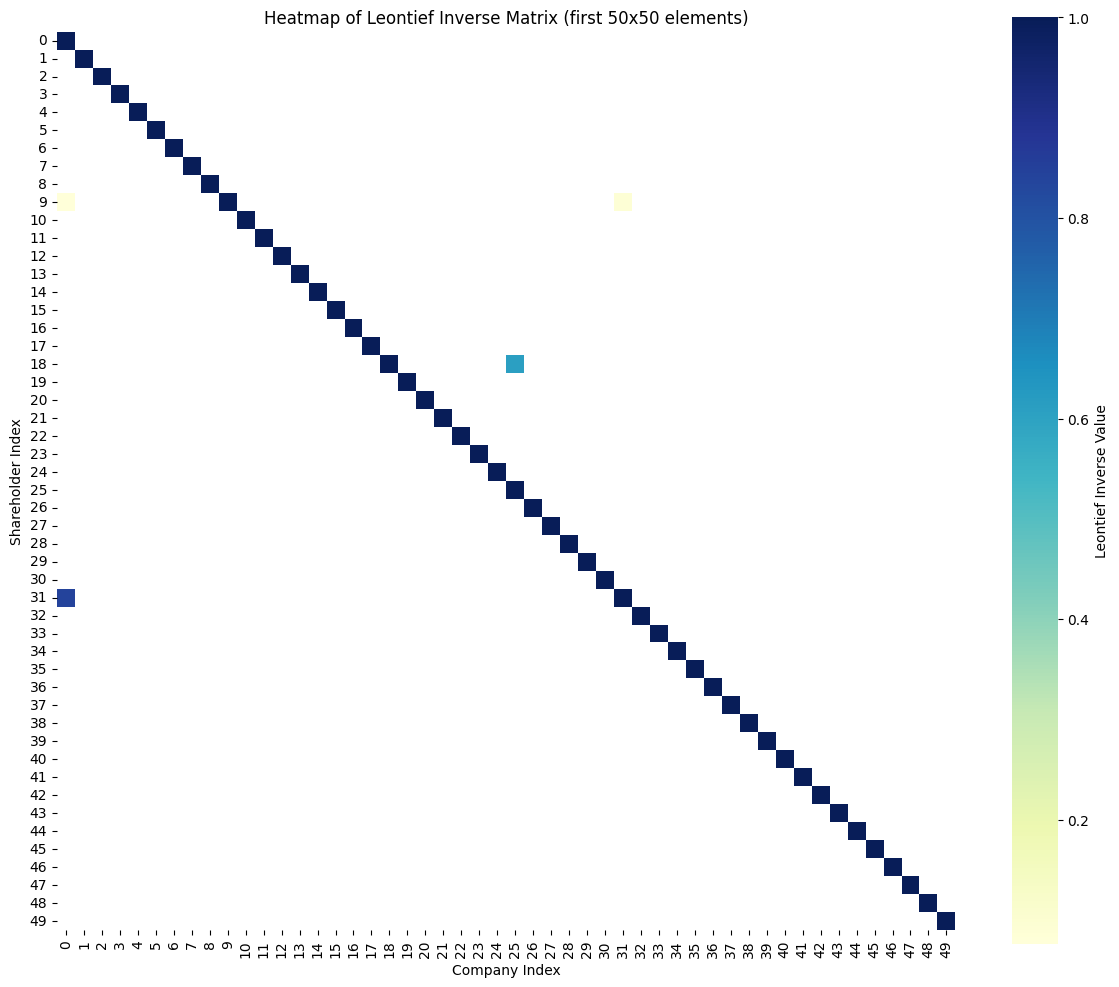

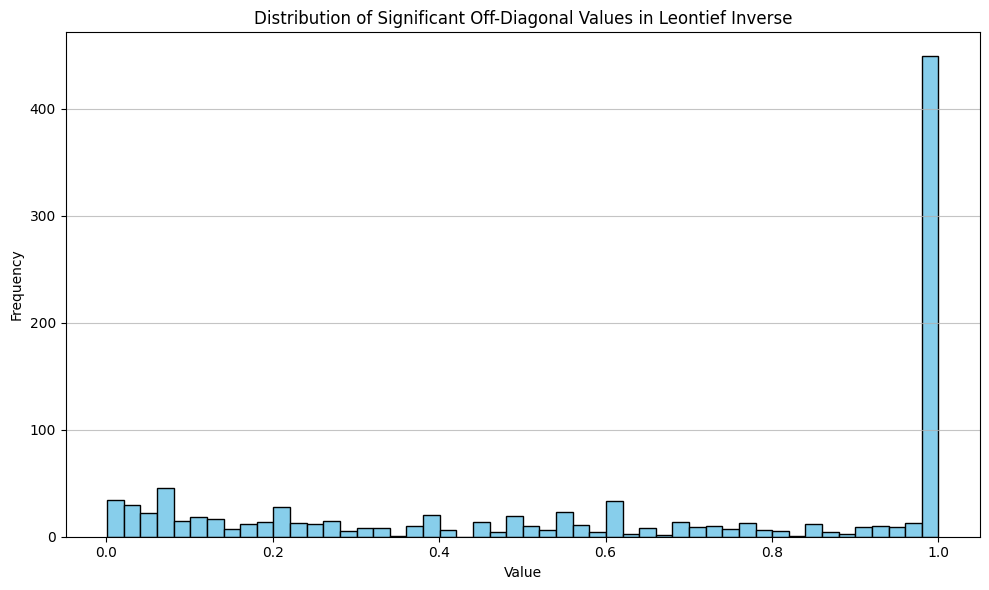

In [20]:
import numpy as np
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.linalg import inv

# [Previous code for data loading and matrix construction stays the same]

# Calculate the Leontief inverse of the ownership matrix
print("\nCalculating Leontief inverse matrix (I - A)^(-1)...")

# Create identity matrix of the same size as A
I = np.eye(n)

try:
    # Calculate (I - A)^(-1)
    leontief_inverse = inv(I - A)

    # Print a preview of the Leontief inverse
    preview_size = min(10, n)
    print(f"\nLeontief inverse matrix preview (first {preview_size}x{preview_size}):")
    print(leontief_inverse[:preview_size, :preview_size])

    # Calculate some basic statistics of the Leontief inverse
    nonzero_leontief = np.count_nonzero(leontief_inverse)
    max_value = np.max(leontief_inverse)
    min_value = np.min(leontief_inverse)

    print(f"\nLeontief inverse statistics:")
    print(f"- Non-zero elements: {nonzero_leontief} out of {n*n} ({nonzero_leontief/(n*n)*100:.2f}%)")
    print(f"- Maximum value: {max_value:.6f}")
    print(f"- Minimum value: {min_value:.6f}")

    # Find the largest elements in the Leontief inverse
    print("\nTop 10 largest values in the Leontief inverse matrix:")
    flat_indices = np.argsort(leontief_inverse.flatten())[-10:]
    max_indices = np.array(np.unravel_index(flat_indices, leontief_inverse.shape)).T

    for idx, (i, j) in enumerate(max_indices[::-1], 1):
        shareholder = index_to_entity[i]
        company = index_to_entity[j]
        value = leontief_inverse[i, j]
        print(f"{idx}. Shareholder {shareholder} -> Company {company}: {value:.6f}")

    # Visualize the Leontief inverse using a heatmap (for a subset if it's large)
    display_size = min(50, n)  # Limit visualization to at most 50x50

    plt.figure(figsize=(12, 10))
    mask = np.abs(leontief_inverse[:display_size, :display_size]) < 0.01  # Mask very small values
    ax = sns.heatmap(
        leontief_inverse[:display_size, :display_size],
        cmap="YlGnBu",
        mask=mask,
        annot=False,
        fmt=".3f",
        square=True,
        cbar_kws={'label': 'Leontief Inverse Value'}
    )
    plt.title(f"Heatmap of Leontief Inverse Matrix (first {display_size}x{display_size} elements)")
    plt.xlabel('Company Index')
    plt.ylabel('Shareholder Index')
    plt.tight_layout()
    plt.show()

    # Histogram of Leontief values
    plt.figure(figsize=(10, 6))
    # Filter out the diagonal elements (which are always >= 1)
    off_diagonal = leontief_inverse[~np.eye(n, dtype=bool)].flatten()
    # Plot only non-trivial values
    significant_values = off_diagonal[off_diagonal > 0.001]
    plt.hist(significant_values, bins=50, color='skyblue', edgecolor='black')
    plt.title('Distribution of Significant Off-Diagonal Values in Leontief Inverse')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"\nError calculating Leontief inverse: {e}")
    print("This might be due to singularity in (I-A) or computational instability.")

    # Calculate cumulative path matrices as an alternative
    print("\nCalculating cumulative ownership path matrices instead...")

    # Define maximum path length
    max_path_length = 10

    # Initial path matrix (length=1, i.e., direct ownership)
    path_matrices = {1: A.copy()}

    # Calculate power matrices up to maximum length
    for k in range(2, max_path_length + 1):
        # Calculate path matrix of length k
        path_matrices[k] = np.matmul(A, path_matrices[k-1])

        # Output the number of non-zero paths for each path length
        nonzero_paths = np.count_nonzero(path_matrices[k])
        print(f"Number of non-zero paths with length = {k}: {nonzero_paths}")

        # Stop calculation if very few non-zero paths
        if nonzero_paths < 10:
            print(f"Number of non-zero paths with length = {k} is below threshold, "
                  f"stopping higher power calculation.")
            break

    # Calculate cumulative ownership matrix (I + A + A² + ... + A^max_path_length)
    actual_max_path_length = max(path_matrices.keys())
    cumulative_matrix = I.copy()

    for k in range(1, actual_max_path_length + 1):
        cumulative_matrix += path_matrices[k]

    # Print a preview of the cumulative matrix
    preview_size = min(10, n)
    print(f"\nCumulative ownership matrix (I + A + A² + ... + A^{actual_max_path_length}) preview:")
    print(cumulative_matrix[:preview_size, :preview_size])

    # Find the largest elements in the cumulative matrix
    print("\nTop 10 largest values in the cumulative matrix:")
    flat_indices = np.argsort(cumulative_matrix.flatten())[-10:]
    max_indices = np.array(np.unravel_index(flat_indices, cumulative_matrix.shape)).T

    for idx, (i, j) in enumerate(max_indices[::-1], 1):
        shareholder = index_to_entity[i]
        company = index_to_entity[j]
        value = cumulative_matrix[i, j]
        print(f"{idx}. Shareholder {shareholder} -> Company {company}: {value:.6f}")

In [18]:
import pandas as pd
import numpy as np
from collections import defaultdict

def identify_ubos_matrix_method(ownership_data, control_threshold=0.5, max_path_length=10):
    """
    Identify Ultimate Beneficial Owners (UBOs) using pure matrix method.

    Parameters:
    ownership_data: DataFrame, containing shareholder_id, company_id, shareholder_percent columns
    control_threshold: float, control threshold (default: 50%)
    max_path_length: int, maximum control chain length

    Returns:
    DataFrame: containing ultimate beneficial owners and their control paths
    """
    # Ensure percentages are in decimal form
    ownership_data['ownership_ratio'] = ownership_data['shareholder_percent'] / 100

    # Create entity list and index mappings
    all_entities = set(ownership_data['shareholder_id']).union(set(ownership_data['company_id']))
    all_entities = sorted(list(all_entities))

    entity_to_index = {entity: i for i, entity in enumerate(all_entities)}
    index_to_entity = {i: entity for i, entity in enumerate(all_entities)}

    # Step 1: Create direct ownership matrix A
    n = len(all_entities)
    A = np.zeros((n, n))

    for _, row in ownership_data.iterrows():
        shareholder = row['shareholder_id']
        company = row['company_id']
        ownership = row['ownership_ratio']

        i = entity_to_index[shareholder]
        j = entity_to_index[company]
        A[i, j] = ownership

    # Step 2: Create direct control matrix (only keep relationships >= threshold)
    A_control = np.zeros_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if A[i, j] >= control_threshold:
                A_control[i, j] = A[i, j]

    # Step 3: Initialize UBO matrix and control chain data structures
    UBO_matrix = np.zeros_like(A)
    control_chains = {}
    control_chain_lengths = {}

    # Record direct control relationships
    for i in range(A_control.shape[0]):
        for j in range(A_control.shape[1]):
            if A_control[i, j] > 0:
                shareholder = index_to_entity[i]
                company = index_to_entity[j]

                # Initialize control chain
                control_chains[(shareholder, company)] = [shareholder, company]
                control_chain_lengths[(shareholder, company)] = 1

                # Record direct control to UBO matrix
                UBO_matrix[i, j] = A_control[i, j]

    # Step 4: Use matrix power multiplication to calculate indirect control
    current_matrix = A_control.copy()
    path_matrices = {1: current_matrix.copy()}

    # Track processed relationships to avoid duplicates and loops
    processed_relations = set()
    for i in range(A_control.shape[0]):
        for j in range(A_control.shape[1]):
            if A_control[i, j] > 0:
                processed_relations.add((i, j))

    # Iteratively calculate control relationships
    for k in range(2, max_path_length + 1):
        # Calculate next control matrix: A_k+1 = A_k × A_control
        next_matrix_raw = np.matmul(current_matrix, A_control)

        # Create next step control matrix, only keep relationships >= threshold
        next_matrix = np.zeros_like(next_matrix_raw)
        new_control_paths_found = False

        for i in range(next_matrix_raw.shape[0]):
            for j in range(next_matrix_raw.shape[1]):
                # Check if already processed to avoid loops
                if (i, j) in processed_relations:
                    continue

                # If meets threshold, record the control relationship
                if next_matrix_raw[i, j] >= control_threshold:
                    next_matrix[i, j] = next_matrix_raw[i, j]
                    processed_relations.add((i, j))
                    new_control_paths_found = True

                    shareholder = index_to_entity[i]
                    company = index_to_entity[j]

                    # Look for intermediate entities to build control chain
                    for m in range(current_matrix.shape[1]):
                        if current_matrix[i, m] > 0 and A_control[m, j] > 0:
                            intermediate = index_to_entity[m]

                            # Check if path already exists in UBO matrix
                            if UBO_matrix[i, j] == 0:
                                UBO_matrix[i, j] = next_matrix[i, j]

                            # If control chain exists, check if new path is shorter
                            if (shareholder, company) in control_chains:
                                if control_chain_lengths[(shareholder, company)] > k:
                                    if (shareholder, intermediate) in control_chains:
                                        prev_chain = control_chains[(shareholder, intermediate)]
                                        # Build new chain, avoid duplicates
                                        new_chain = prev_chain.copy()
                                        if company not in new_chain:
                                            new_chain.append(company)
                                        control_chains[(shareholder, company)] = new_chain
                                        control_chain_lengths[(shareholder, company)] = k
                            else:
                                # Create new control chain
                                if (shareholder, intermediate) in control_chains:
                                    prev_chain = control_chains[(shareholder, intermediate)]
                                    # Build new chain, avoid duplicates
                                    new_chain = prev_chain.copy()
                                    if company not in new_chain:
                                        new_chain.append(company)
                                    control_chains[(shareholder, company)] = new_chain
                                    control_chain_lengths[(shareholder, company)] = k

        # Store this step's control matrix
        path_matrices[k] = next_matrix.copy()

        # Check if new control paths still exist
        if not new_control_paths_found:
            print(f"No new control paths found at path length = {k}, stopping iteration.")
            break

        # Update current matrix
        current_matrix = next_matrix

    # Step 5: Identify and extract ultimate beneficial owners
    # Create in-degree matrix to identify which entities are controlled
    in_degree = np.sum(UBO_matrix, axis=0)

    # Create pure shareholder indicator - entities with in-degree 0 are pure shareholders
    pure_shareholders = []
    for i in range(len(in_degree)):
        if in_degree[i] == 0 and np.sum(UBO_matrix[i, :]) > 0:  # Not controlled but controls others
            pure_shareholders.append(index_to_entity[i])

    # Extract ultimate owner relationships
    ultimate_owners = {}

    # Prioritize pure shareholders
    if pure_shareholders:
        for i in range(UBO_matrix.shape[0]):
            shareholder = index_to_entity[i]
            if shareholder not in pure_shareholders:
                continue

            for j in range(UBO_matrix.shape[1]):
                if UBO_matrix[i, j] > 0:
                    company = index_to_entity[j]

                    # Avoid self-control
                    if shareholder != company:
                        # Get control chain
                        chain = control_chains.get((shareholder, company), [shareholder, company])
                        length = control_chain_lengths.get((shareholder, company), 1)

                        # Check if shorter control chain exists
                        if company in ultimate_owners:
                            if length < ultimate_owners[company]['chain_length']:
                                ultimate_owners[company] = {
                                    'ultimate_owner': shareholder,
                                    'control_chain': chain,
                                    'chain_length': length,
                                    'ownership': UBO_matrix[i, j] * 100  # Convert to percentage
                                }
                        else:
                            ultimate_owners[company] = {
                                'ultimate_owner': shareholder,
                                'control_chain': chain,
                                'chain_length': length,
                                'ownership': UBO_matrix[i, j] * 100  # Convert to percentage
                            }

    # If no pure shareholder control relationships found, consider all control relationships
    if len(ultimate_owners) == 0:
        for i in range(UBO_matrix.shape[0]):
            for j in range(UBO_matrix.shape[1]):
                if UBO_matrix[i, j] > 0:
                    shareholder = index_to_entity[i]
                    company = index_to_entity[j]

                    # Avoid self-control
                    if shareholder != company:
                        # Get control chain
                        chain = control_chains.get((shareholder, company), [shareholder, company])
                        length = control_chain_lengths.get((shareholder, company), 1)

                        # Check if shorter control chain exists
                        if company in ultimate_owners:
                            if length < ultimate_owners[company]['chain_length']:
                                ultimate_owners[company] = {
                                    'ultimate_owner': shareholder,
                                    'control_chain': chain,
                                    'chain_length': length,
                                    'ownership': UBO_matrix[i, j] * 100  # Convert to percentage
                                }
                        else:
                            ultimate_owners[company] = {
                                'ultimate_owner': shareholder,
                                'control_chain': chain,
                                'chain_length': length,
                                'ownership': UBO_matrix[i, j] * 100  # Convert to percentage
                            }

    # Step 6: Create ultimate owner table
    rows = []
    for company, info in ultimate_owners.items():
        rows.append({
            'Company ID': company,
            'Ultimate Owner': info['ultimate_owner'],
            'Control Chain': ' -> '.join(map(str, info['control_chain'])),
            'Chain Length': info['chain_length'],
            'Effective Ownership %': f"{info['ownership']:.2f}%"
        })

    if not rows:
        print("No ultimate beneficial owners found for any company.")
        return None

    df_ultimate = pd.DataFrame(rows)

    # Sort by control chain length
    df_ultimate = df_ultimate.sort_values(by=['Chain Length', 'Effective Ownership %'],
                                          ascending=[False, False])

    return df_ultimate

# For use in Google Colab environment
if __name__ == "__main__":
    # Import files module from Colab
    from google.colab import files
    print("Please upload ownership data CSV file...")
    uploaded = files.upload()  # Will open file selection dialog

    # Read the uploaded CSV file
    filename = list(uploaded.keys())[0]  # Get uploaded filename
    print(f"Successfully uploaded file: {filename}")
    df = pd.read_csv(filename)

    # Ensure column names are correct
    required_columns = ['shareholder_id', 'company_id', 'shareholder_percent']
    for col in required_columns:
        if col not in df.columns:
            print(f"Dataset missing required column: {col}")
            if col == 'shareholder_percent' and 'ownership_percent' in df.columns:
                df['shareholder_percent'] = df['ownership_percent']
            else:
                raise ValueError(f"Cannot continue: missing {col} column")

    # Use matrix method to identify UBOs
    print("Identifying Ultimate Beneficial Owners using pure matrix method...")
    # Fixed control threshold at 50%
    result = identify_ubos_matrix_method(df, control_threshold=0.5, max_path_length=10)

    if result is not None:
        # Print results
        pd.set_option('display.max_columns', None)
        pd.set_option('display.width', 150)
        pd.set_option('display.colheader_justify', 'center')

        # Reorganize data from controller perspective
        controller_view = result.groupby('Ultimate Owner').apply(
            lambda x: pd.Series({
                'Controlled Companies': len(x),
                'Average Chain Length': x['Chain Length'].mean(),
                'Max Chain Length': x['Chain Length'].max(),
                'Control Chains': ', '.join([f"{row['Company ID']} ({row['Chain Length']})"
                                              for _, row in x.iterrows()])
            })
        ).reset_index()

        # Sort by number of controlled companies
        controller_view = controller_view.sort_values('Controlled Companies', ascending=False)

        print("\nUltimate Beneficial Owners and their controlled companies:")
        print("="*120)
        print(controller_view.to_string(index=False))
        print("="*120)

        # Statistical analysis
        print(f"\nIdentified {len(controller_view)} ultimate beneficial owners controlling {result['Company ID'].nunique()} companies")

        # Control chain length distribution
        length_dist = result['Chain Length'].value_counts().sort_index()

        print("\nControl chain length distribution:")
        print("-"*40)
        for length, count in length_dist.items():
            print(f"Length = {length}: {count} chains ({count/len(result)*100:.2f}%)")

        # Save results to CSV
        try:
            controller_view.to_csv('ultimate_controller_analysis.csv', index=False)
            print("\nSaved Ultimate Controller table to 'ultimate_controller_analysis.csv'")
        except Exception as e:
            print(f"\nFailed to save CSV file: {e}")

Please upload ownership data CSV file...


Saving synthetic_company_structures_500_links.csv to synthetic_company_structures_500_links (4).csv
Successfully uploaded file: synthetic_company_structures_500_links (4).csv
Identifying Ultimate Beneficial Owners using pure matrix method...
No new control paths found at path length = 9, stopping iteration.

Ultimate Beneficial Owners and their controlled companies:
 Ultimate Owner  Controlled Companies  Average Chain Length  Max Chain Length                                          Control Chains                                         
      110                 11                 3.909091               7         423 (7), 566 (6), 623 (6), 847 (6), 770 (5), 576 (4), 934 (3), 673 (2), 41 (2), 767 (1), 422 (1)
      105                 10                 3.200000               6                    207 (6), 179 (5), 465 (5), 1 (4), 414 (3), 868 (3), 925 (2), 664 (2), 51 (1), 691 (1)
      324                 10                 2.500000               4                   79 (4), 23 (4), 21

<ipython-input-18-425a4d2ed5ff>:278: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  controller_view = result.groupby('Ultimate Owner').apply(



Generating visualization of UBO distribution...


<Figure size 1400x800 with 0 Axes>

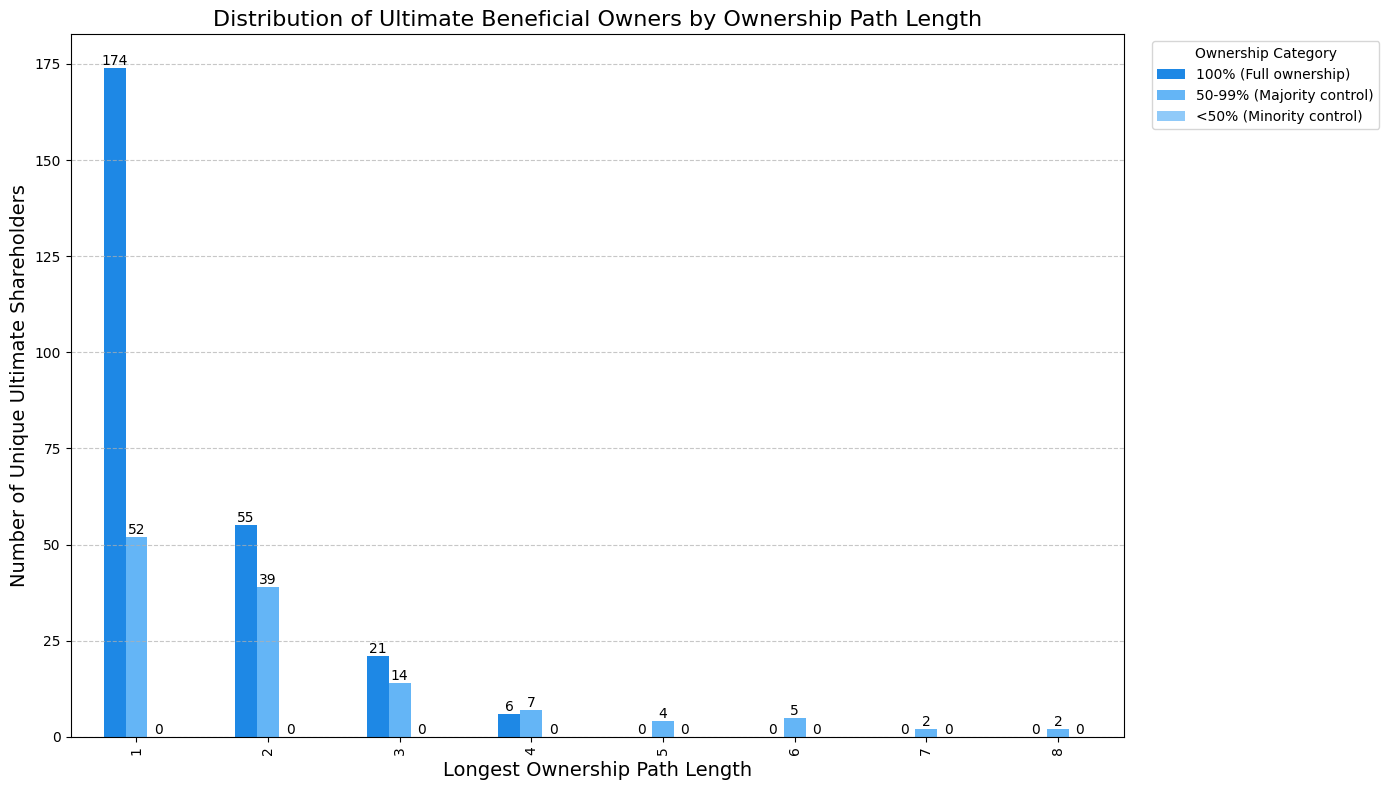

Visualization saved as 'ubo_distribution.png'

UBO Distribution by Ownership Category and Chain Length:
 Chain Length  100% (Full ownership)  50-99% (Majority control)  <50% (Minority control)
      1                174                       52                        0            
      2                 55                       39                        0            
      3                 21                       14                        0            
      4                  6                        7                        0            
      5                  0                        4                        0            
      6                  0                        5                        0            
      7                  0                        2                        0            
      8                  0                        2                        0            


<Figure size 640x480 with 0 Axes>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_ubo_results(result_df):
    """
    Visualize the UBO results from the matrix method algorithm

    Parameters:
    result_df: DataFrame - Output from the identify_ubos_matrix_method function
    """
    # Extract control chain lengths and create a new column for ownership percentage ranges
    df_viz = result_df.copy()

    # Extract effective ownership percentage as numeric value
    df_viz['Effective Ownership'] = df_viz['Effective Ownership %'].str.rstrip('%').astype(float)

    # Categorize ownership percentages into three categories
    def categorize_ownership(ownership):
        if ownership == 100:
            return "100% (Full ownership)"
        elif 50 <= ownership < 100:
            return "50-99% (Majority control)"
        else:
            return "<50% (Minority control)"

    df_viz['Ownership Category'] = df_viz['Effective Ownership'].apply(categorize_ownership)

    # Create a crosstab of chain length and ownership category
    ownership_by_length = pd.crosstab(df_viz['Chain Length'], df_viz['Ownership Category'])

    # Fill any missing categories with 0
    all_categories = ["100% (Full ownership)", "50-99% (Majority control)", "<50% (Minority control)"]
    for cat in all_categories:
        if cat not in ownership_by_length.columns:
            ownership_by_length[cat] = 0

    # Order the columns
    ownership_by_length = ownership_by_length[all_categories]

    # Reset index to make Chain Length a column
    ownership_by_length = ownership_by_length.reset_index()

    # Plotting
    plt.figure(figsize=(14, 8))

    # Set custom blue color palette
    colors = ['#1E88E5', '#64B5F6', '#90CAF9']  # Dark blue, medium blue, light blue

    # Create the grouped bar chart
    ax = ownership_by_length.plot(
        x='Chain Length',
        y=all_categories,
        kind='bar',
        stacked=False,
        color=colors,
        figsize=(14, 8)
    )

    # Customize the plot
    plt.title('Distribution of Ultimate Beneficial Owners by Ownership Path Length', fontsize=16)
    plt.xlabel('Longest Ownership Path Length', fontsize=14)
    plt.ylabel('Number of Unique Ultimate Shareholders', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Ownership Category', bbox_to_anchor=(1.02, 1), loc='upper left')

    # Add value labels on top of each bar
    for container in ax.containers:
        ax.bar_label(container, label_type='edge')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

    # Save the figure
    plt.savefig('ubo_distribution.png', dpi=300, bbox_inches='tight')
    print("Visualization saved as 'ubo_distribution.png'")

    # Return the processed data for potential further use
    return ownership_by_length

# Example usage within the main function
if __name__ == "__main__":
    # After running the identify_ubos_matrix_method function:
    # result = identify_ubos_matrix_method(df, control_threshold=0.5, max_path_length=10)

    # Add visualization to the end of the main function:
    print("\nGenerating visualization of UBO distribution...")
    ownership_distribution = visualize_ubo_results(result)

    # Print the distribution data
    print("\nUBO Distribution by Ownership Category and Chain Length:")
    print(ownership_distribution.to_string(index=False))

The workflow of the hybrid matrix vs. graph method is:
Matrix computation phase:
Construct ownership matrix A Create control matrix A_control (filter out relationships with >50% ownership) Calculate power matrices A_control², A_control³, etc., to identify potential multistep control relationships Extract pairs of elements (i,j) with non-zero values from the matrix, these represent potential control relationships
Graph search phase:
Convert (i,j) pairs with non-zero elements into relationship pairs (shareholder, company) that require detailed analysis Construct directed graph structure For each pair (shareholder, company), search for specific control paths using DFS/BFS Verify that each step on the path satisfies the ownership > 50% condition Calculate exact cumulative Ownership

Translated with DeepL.com (free version)